In [1]:
#Random Forest Basics:  https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/
#Random Forests (Advanced Concepts): https://towardsdatascience.com/random-forest-3a55c3aca46d

#Reference: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

#Example1: Using Housing Dataset

# train-test split evaluation random forest on the housing dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)

C:\Users\user\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
dataframe.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [4]:
data = dataframe.values
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [5]:
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((506L, 13L), (506L,))
((339L, 13L), (167L, 13L), (339L,), (167L,))


In [6]:
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
print (yhat)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

[29.33 25.39 21.52 20.61 19.61 19.75 29.71 19.07 18.24 23.09 27.83 31.44
 20.47 19.81 20.39 24.51 11.97 38.68 23.41 13.36 20.05 16.   24.78 24.7
 25.62  8.95 14.35 19.12 39.59 12.29 27.03 21.01 48.78 16.1  22.16 20.86
 15.82 33.7  11.59 20.29 24.83 22.98 24.68 15.58 15.67 11.27 49.52 11.48
 20.86 19.02 25.18 21.11 23.94 19.68  9.89 25.21 12.43 27.81 18.57 42.81
 16.07 27.29 12.6  14.13 17.62 33.18 41.9  25.47 22.32 21.53 25.22  6.39
 18.03 22.46 19.45 20.42 41.12 24.76 30.33 33.21 17.14 20.3  32.65 11.25
 24.34 25.91 14.73 25.   20.02 16.91 31.21 44.28 14.04 20.77 15.15 20.41
 24.7  23.78 40.99 20.55 15.65 14.88 24.98 23.44  8.1  20.91 14.83 33.
 26.17 25.58 43.82 25.49 12.36 32.76 38.89 33.49 21.12 18.35 33.17 40.27
 20.81 13.68 30.14 19.82 25.61 19.89 22.76 20.15 19.79 27.66 19.76 21.63
 25.62 10.19 24.65 33.13 14.95 15.94 35.   15.83 23.25 14.23 17.76 24.6
 33.1  21.52 24.7  16.27 26.81 17.94 33.55 14.78 20.61 20.27 13.12 30.84
 26.2  27.28 21.61 26.77 44.36 38.85 26.47 17.24 18.44 

In [14]:
y_test

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4, 25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5,
       43.5, 23.6, 11. , 33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3,
       14.9, 26.6, 19.9, 24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1,
       25. ,  9.7, 23.9, 36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5,
       23.7, 28.5, 24.3, 23.8, 19.1, 28.4, 20.5, 33

In [7]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

ValueError: continuous is not supported

In [17]:
match = 0
for i in range(len(y_test)):
    print (y_test[i], "  ", yhat[i])
    if (y_test[i]==yhat[i]):
        match = match+1
print match

(28.2, '  ', 29.329999999999995)
(23.9, '  ', 25.389999999999997)
(16.6, '  ', 21.520000000000003)
(22.0, '  ', 20.610000000000003)
(20.8, '  ', 19.61)
(23.0, '  ', 19.75)
(27.9, '  ', 29.709999999999997)
(14.5, '  ', 19.07)
(21.5, '  ', 18.240000000000002)
(22.6, '  ', 23.089999999999996)
(23.7, '  ', 27.829999999999995)
(31.2, '  ', 31.439999999999998)
(19.3, '  ', 20.470000000000002)
(19.4, '  ', 19.810000000000002)
(19.4, '  ', 20.390000000000004)
(27.9, '  ', 24.51)
(13.9, '  ', 11.969999999999999)
(50.0, '  ', 38.68000000000001)
(24.1, '  ', 23.410000000000004)
(14.6, '  ', 13.36)
(16.2, '  ', 20.05)
(15.6, '  ', 16.0)
(23.8, '  ', 24.78)
(25.0, '  ', 24.699999999999996)
(23.5, '  ', 25.619999999999997)
(8.3, '  ', 8.950000000000001)
(13.5, '  ', 14.35)
(17.5, '  ', 19.12)
(43.1, '  ', 39.59)
(11.5, '  ', 12.29)
(24.1, '  ', 27.029999999999994)
(18.5, '  ', 21.01)
(50.0, '  ', 48.78)
(12.6, '  ', 16.1)
(19.8, '  ', 22.16)
(24.5, '  ', 20.860000000000003)
(14.9, '  ', 15.820000000

In [2]:
## Example 2:
#Reference: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
#Iris dataset

#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [5]:
#Data Exploration

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,petal length,petal width,sepal length,sepal width,species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


In [85]:
data.isna().sum()

petal length    0
petal width     0
sepal length    0
sepal width     0
species         0
dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
petal length    150 non-null float64
petal width     150 non-null float64
sepal length    150 non-null float64
sepal width     150 non-null float64
species         150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9333333333333333)


In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 13]])

In [24]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.87      0.93      0.90        14
          2       0.93      0.87      0.90        15

avg / total       0.93      0.93      0.93        45



In [26]:
#You can also make a prediction for a single item, for example:
#   sepal length = 3
#   sepal width = 5
#   petal length = 4
#   petal width = 2
clf.predict([[3, 5, 4, 2]])

#Here, 2 indicates the flower type Virginica.

array([1])

In [27]:
#Finding Important Features in Scikit-learn
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.438656
petal width (cm)     0.432684
sepal length (cm)    0.100840
sepal width (cm)     0.027821
dtype: float64

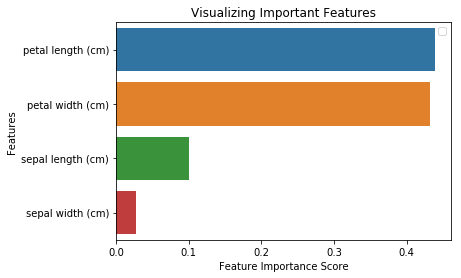

In [29]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [30]:
#Generating the Model on Selected Features
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal width"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [31]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9523809523809523)


In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.93      0.95      0.94        39
          2       0.94      0.91      0.92        32

avg / total       0.95      0.95      0.95       105



In [34]:
#You can also make a prediction for a single item, for example:
#   sepal length = 3
#   sepal width = 5
#   petal length = 4
#   petal width = 2
clf.predict([[3, 5, 4]])

#Here, 2 indicates the flower type Virginica.

array([2])

In [35]:
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
#from urllib.request import urlopen 

In [36]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

Hyperparameters Optimization
---------------------------------
Utilizing the GridSearchCV functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data. Setting the n_jobs to 3 tells the grid search to run three jobs in parallel, reducing the time the function will take to compute the best parameters.

#Reference: https://www.kaggle.com/raviolli77/random-forest-in-python

In [37]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

('Best Parameters using grid search: \n', {'max_features': 'auto', 'bootstrap': True, 'criterion': 'gini', 'max_depth': 2})
Time taken in grid search:  43.65


In [38]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2,
                 n_estimators=50)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [39]:
#Train the model using the training sets y_pred=clf.predict(X_test)
fit_rf.fit(X_train,y_train)

# prediction on test set
y_pred=fit_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9523809523809523)


In [47]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2,
                 n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
fit_rf.fit(X_train,y_train)

# prediction on test set
y_pred=fit_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9523809523809523)


In [ ]:
#For more practice
#Good Problem1: https://www.kaggle.com/prashant111/random-forest-classifier-tutorial
#Good Problem2: https://www.kaggle.com/raviolli77/random-forest-in-python